In [51]:
%matplotlib inline

import os
import sys
import copy
import time
import numpy as np
np.seterr(over='ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# `Orion.cont.image.fits`

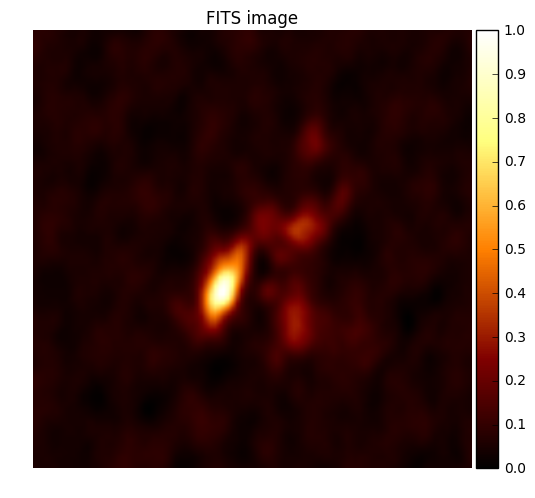

In [58]:
fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

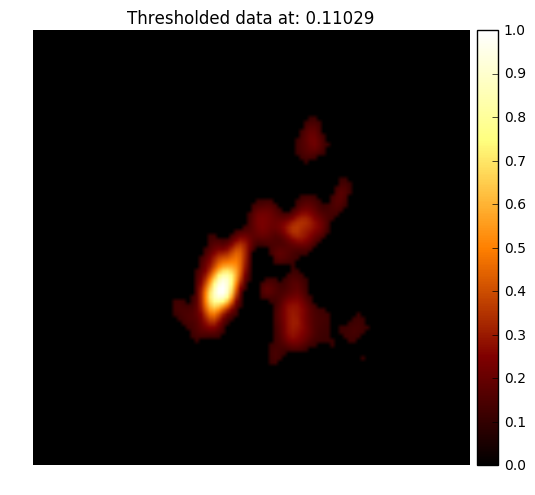

In [59]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

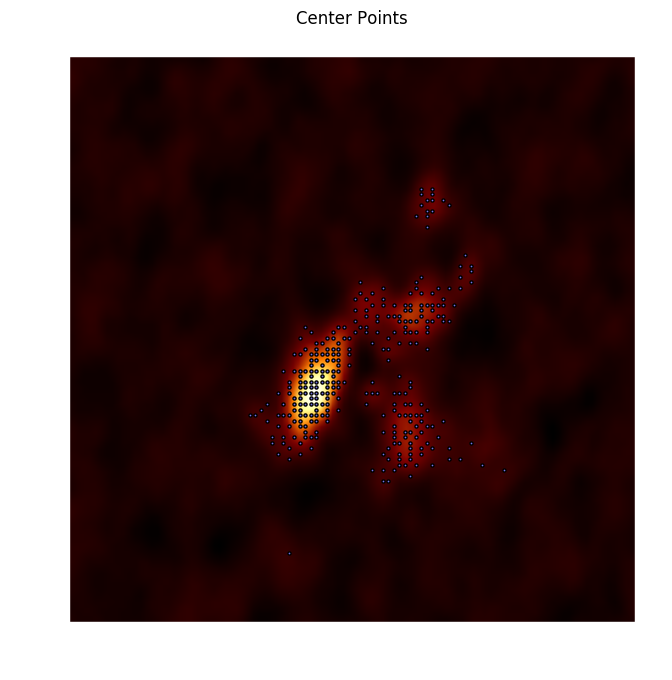

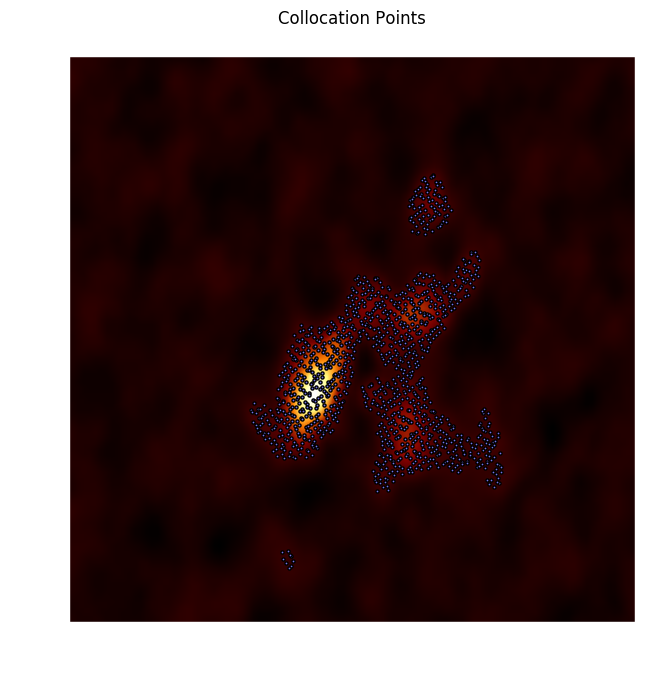

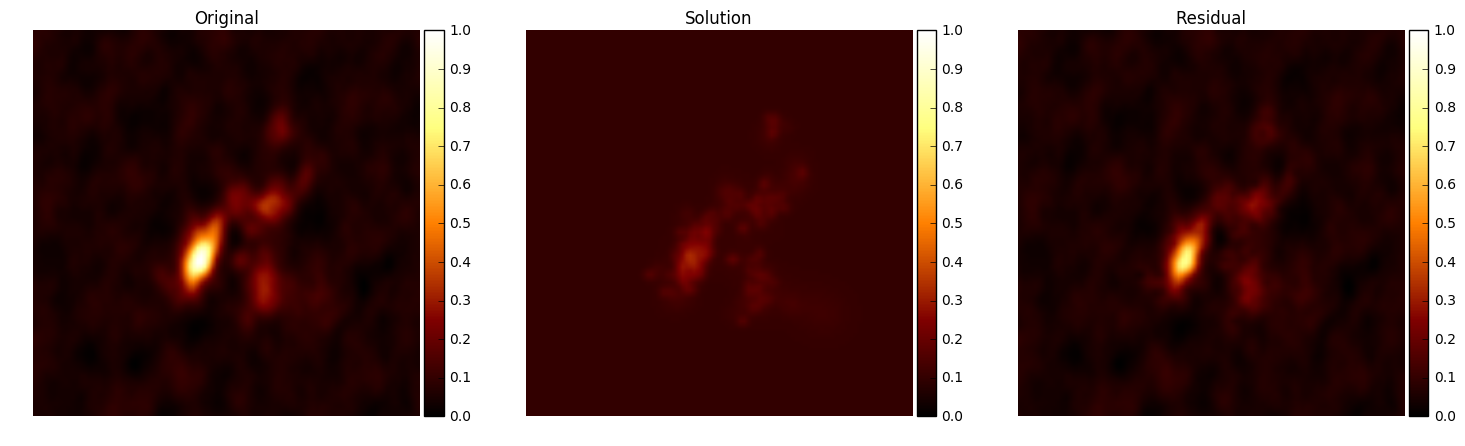

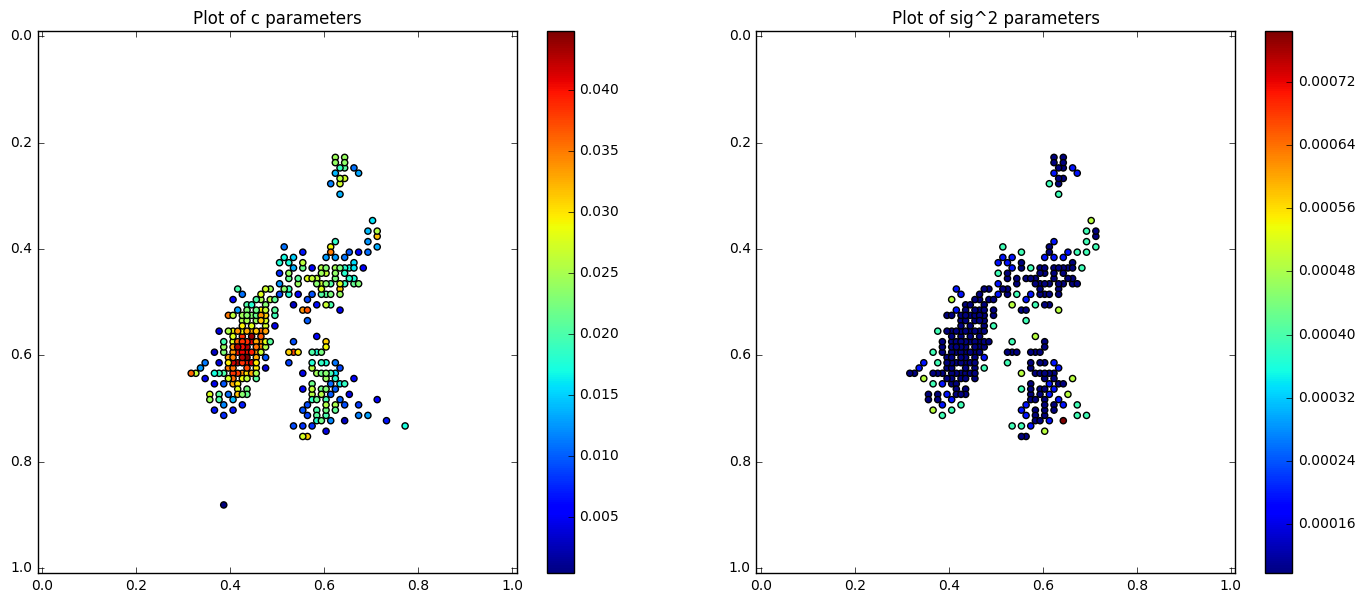

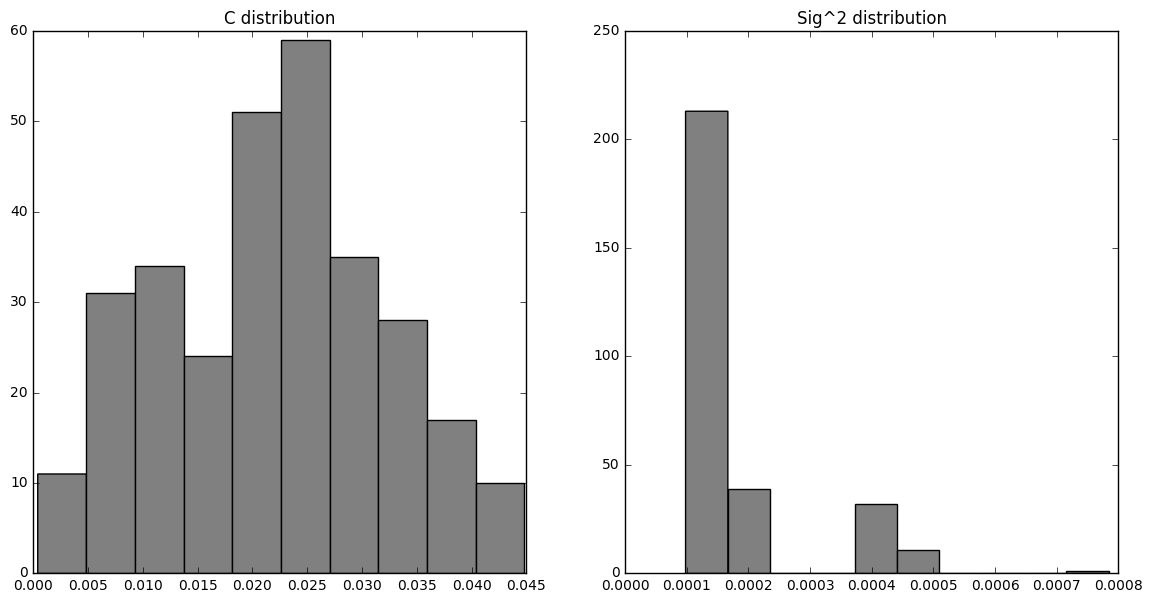

In [7]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 300
Ne = 4*Nc-4*Nb

center_points = random_centers_generation(data, Nc, base_level=base_level, power=5.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)


# right format
xc = center_points[:,0]; yc = center_points[:,1]
xe = collocation_points[:,0]; ye = collocation_points[:,1]
xb = boundary_points[:,0]; yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.100883691971
Residual Variance: 1.63555282839e-05
Residual Entropy: 7.29653159412
Total elapsed time: 379.869919062 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0650724302874
Mean min distance between collocation and center points: 0.0102487695004

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.0612896476903
Max min distance in the (standarized) parameters space: 0.796510118222


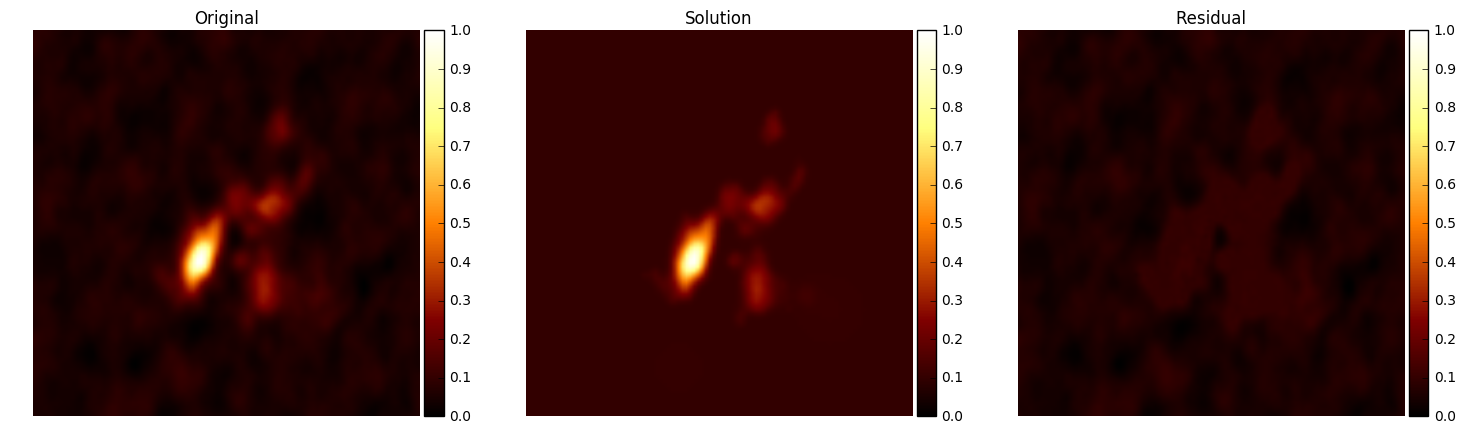

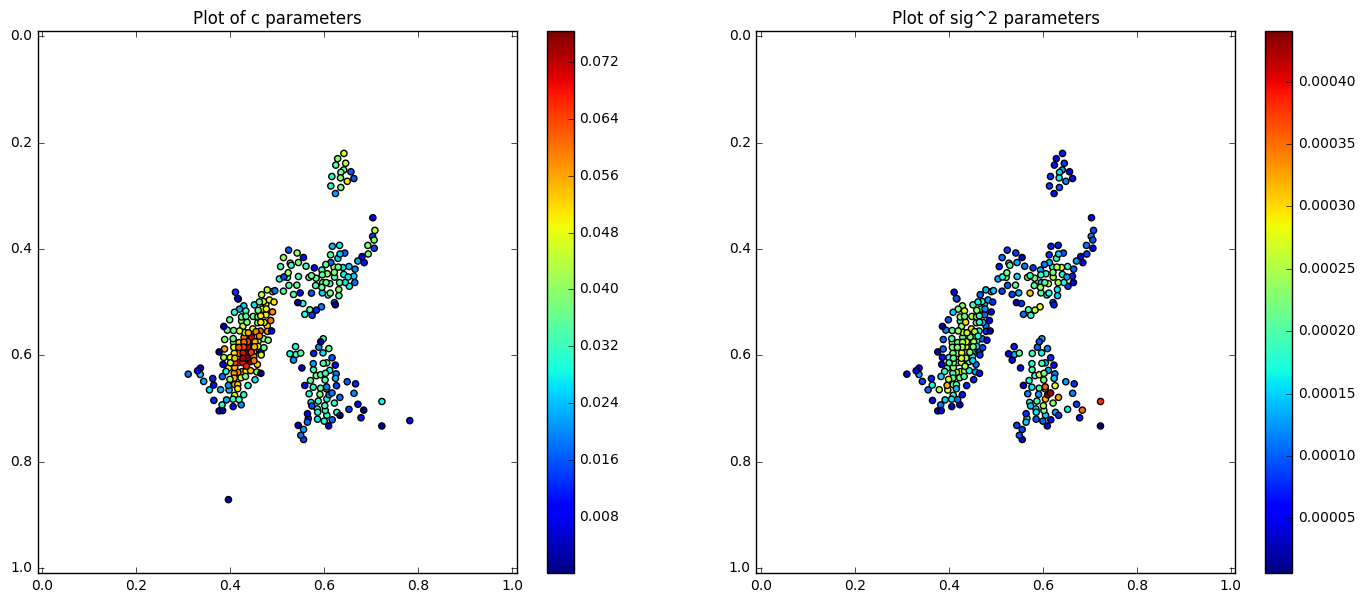

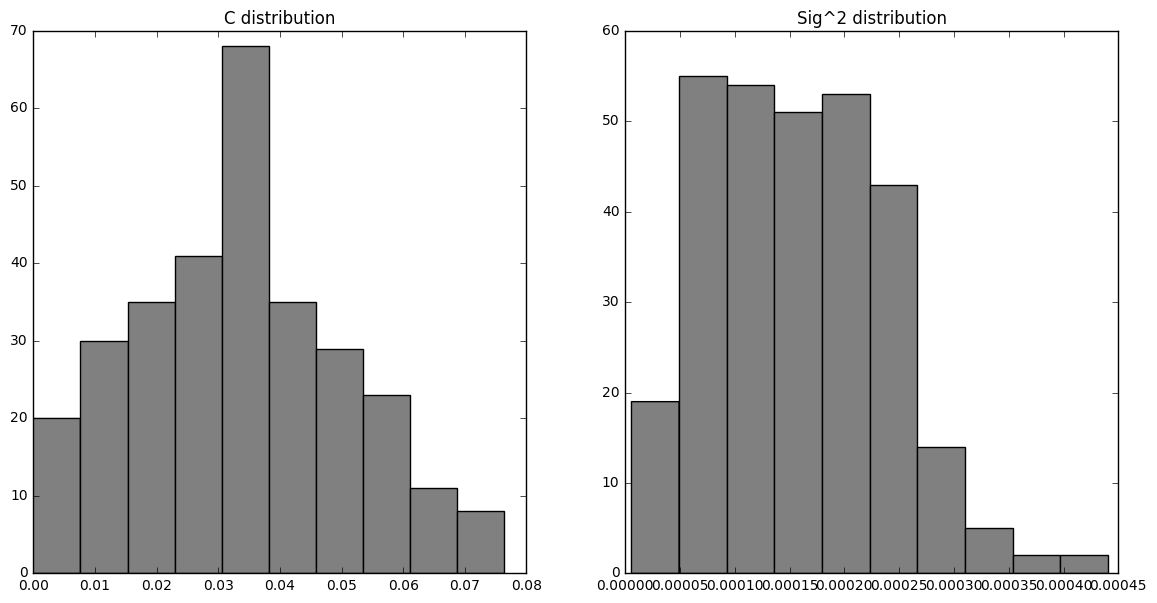

In [10]:
nfev = 100*(len(elm01.get_params())+1)
elm_solver(elm01, method='standard', max_nfev=nfev)

In [11]:
# gaussian agglomeration
xc, yc, c, sig = elm01.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict01 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 276 and 281 with 2.17801462699e-08 dissimilarity
Merged components 238 and 279 with 9.15726924992e-05 dissimilarity
Merged components 122 and 225 with 0.000122288911598 dissimilarity
Merged components 136 and 159 with 0.00025370322763 dissimilarity
Merged components 90 and 240 with 0.000267638159774 dissimilarity
Merged components 148 and 245 with 0.000535213999439 dissimilarity
Merged components 116 and 235 with 0.000580107598466 dissimilarity
Merged components 203 and 252 with 0.000693649845213 dissimilarity
Merged components 97 and 140 with 0.000985807252782 dissimilarity
Merged components 87 and 172 with 0.000995920912179 dissimilarity
Merged components 168 and 242 with 0.00108233432273 dissimilarity
Merged components 84 and 145 with 0.00111575085208 dissimilarity
Merged components 127 and 239 with 0.00112204608458 dissimilarity
Merged components 38 and 271 with 0.00143617810554 dissimilarity
Merged components 67 and 179 with 0.00158345918318 dissimilarity
Merged 

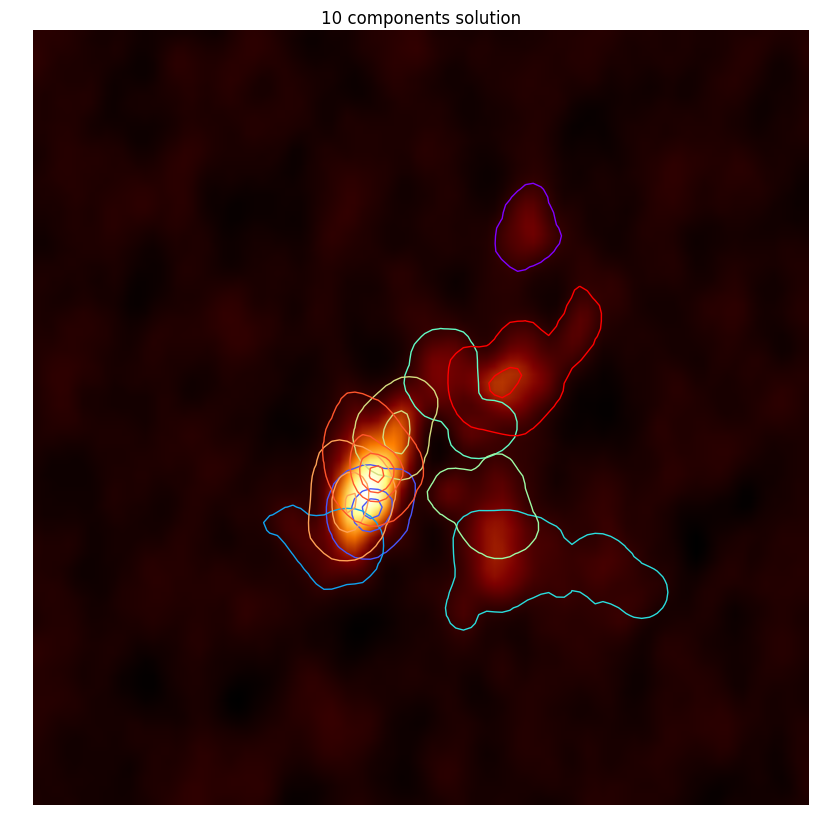

<function graph.components_plot>

In [12]:
interact(components_plot, elm=fixed(elm01), data=fixed(data), components_dict=fixed(components_dict01), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

# `M100_combine_CO_cube.image.mom0.pbcor`

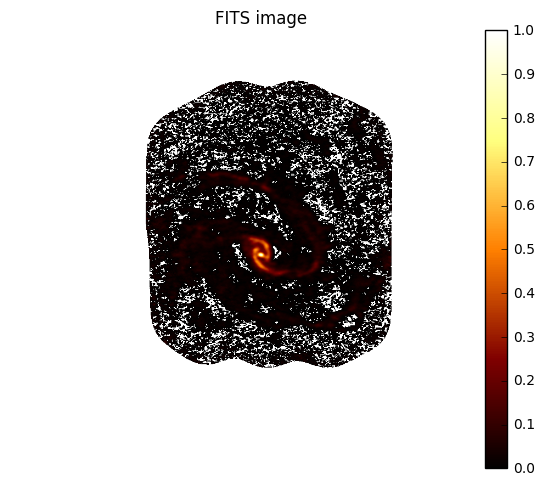

In [60]:
fits_path = '../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

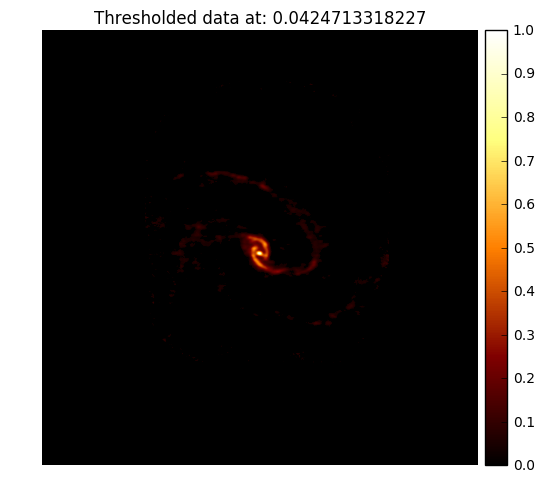

In [61]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

../lib/points_generation.py:50: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level


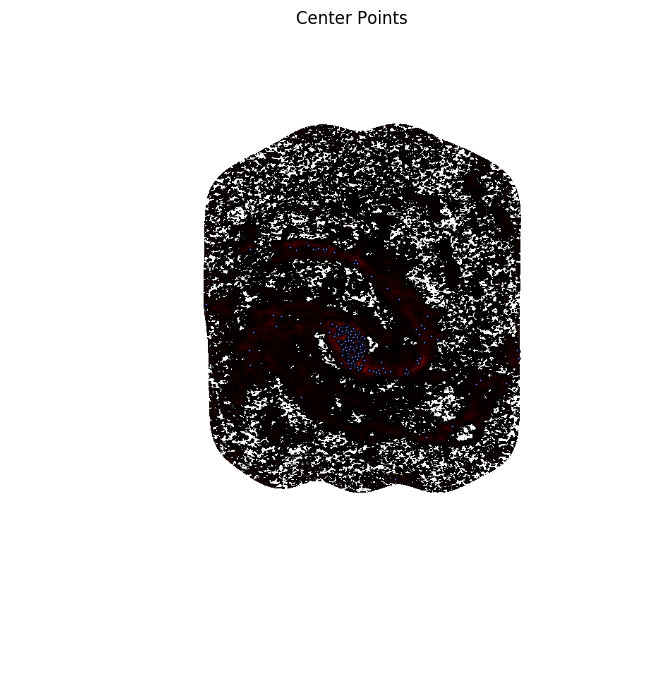

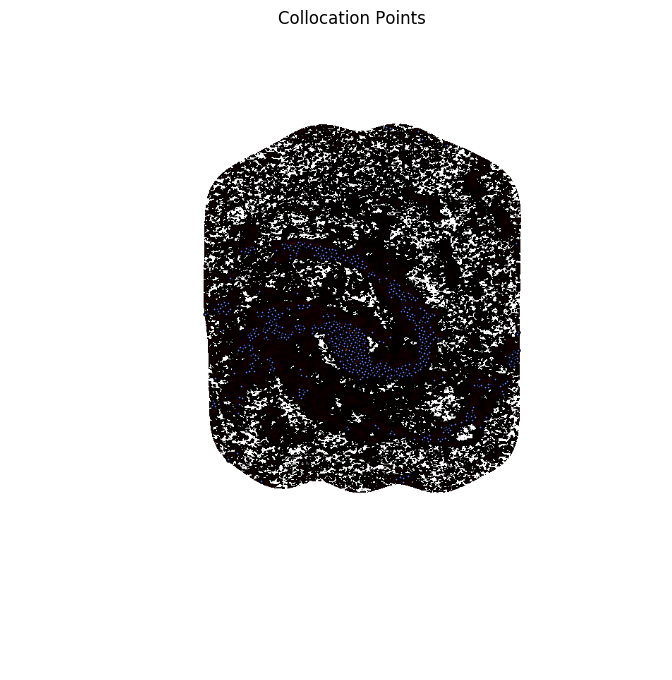

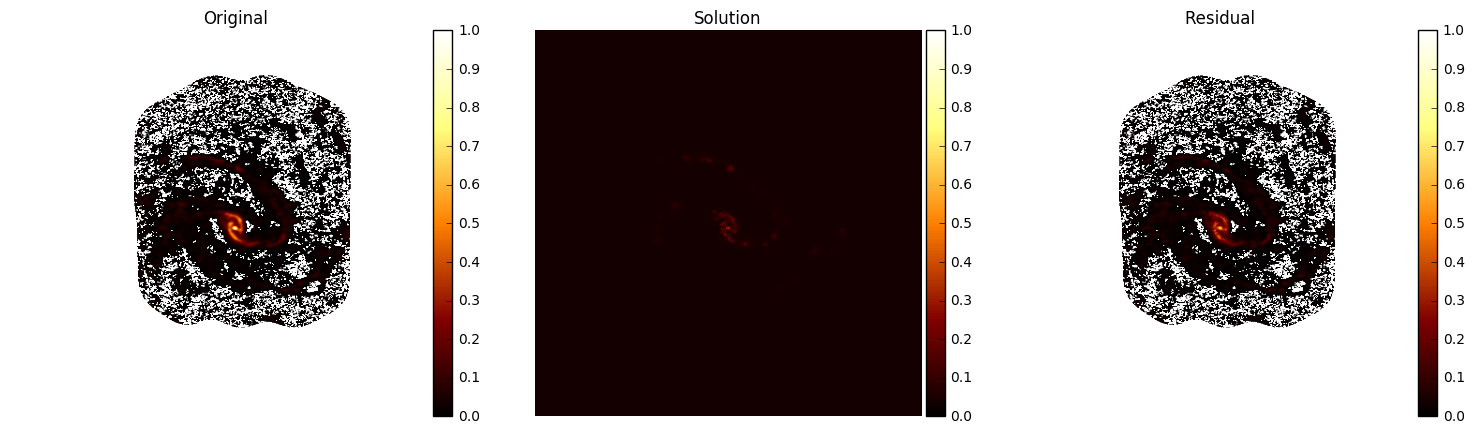

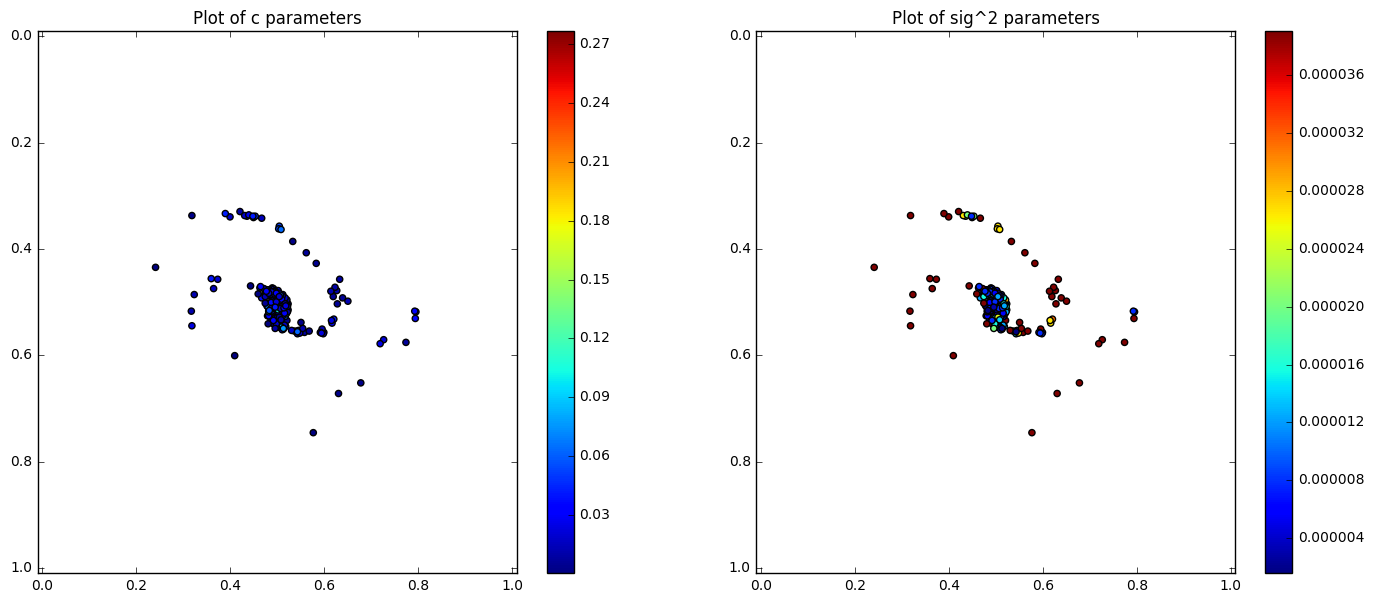

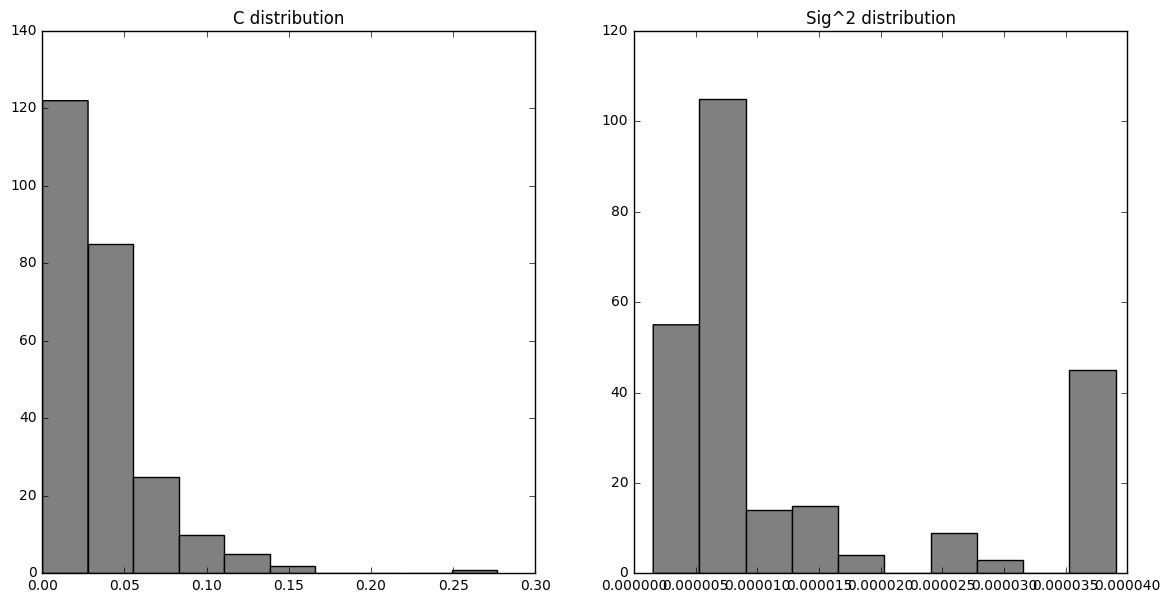

../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


In [15]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 250
Ne = 4*Nc-4*Nb

center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
#points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
#center_points = points[0:Nc]
#collocation_points = points[Nc:Nc+Ne]
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)


# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm02 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100112

Residual stats:
Residual RMS: 0.0515990849615
Residual Variance: 0.00045074454527
Residual Entropy: 4.49094410706
Total elapsed time: 174.816396952 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.263044135147
Mean min distance between collocation and center points: 0.0142715253432

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.0556531297905
Max min distance in the (standarized) parameters space: 0.373931700478


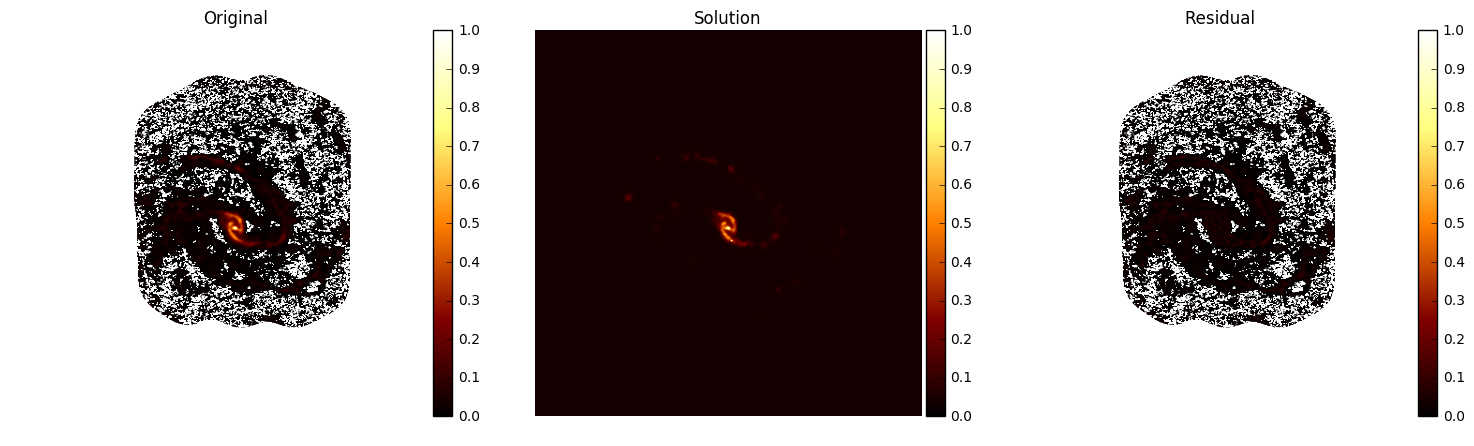

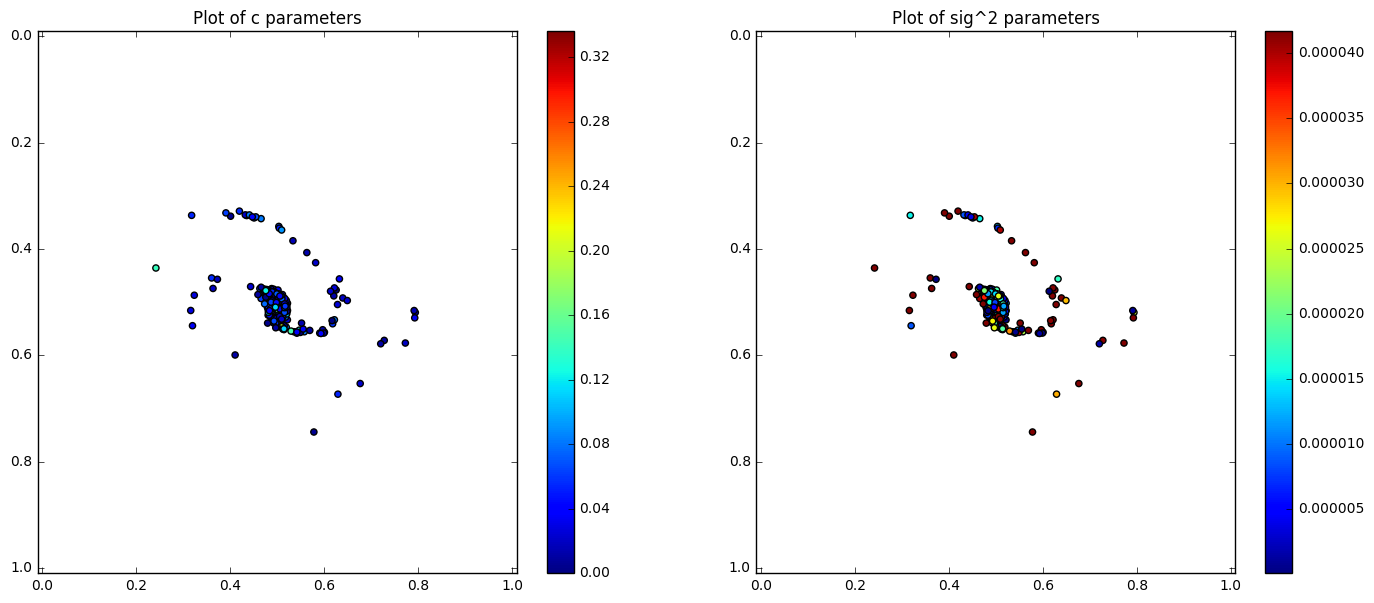

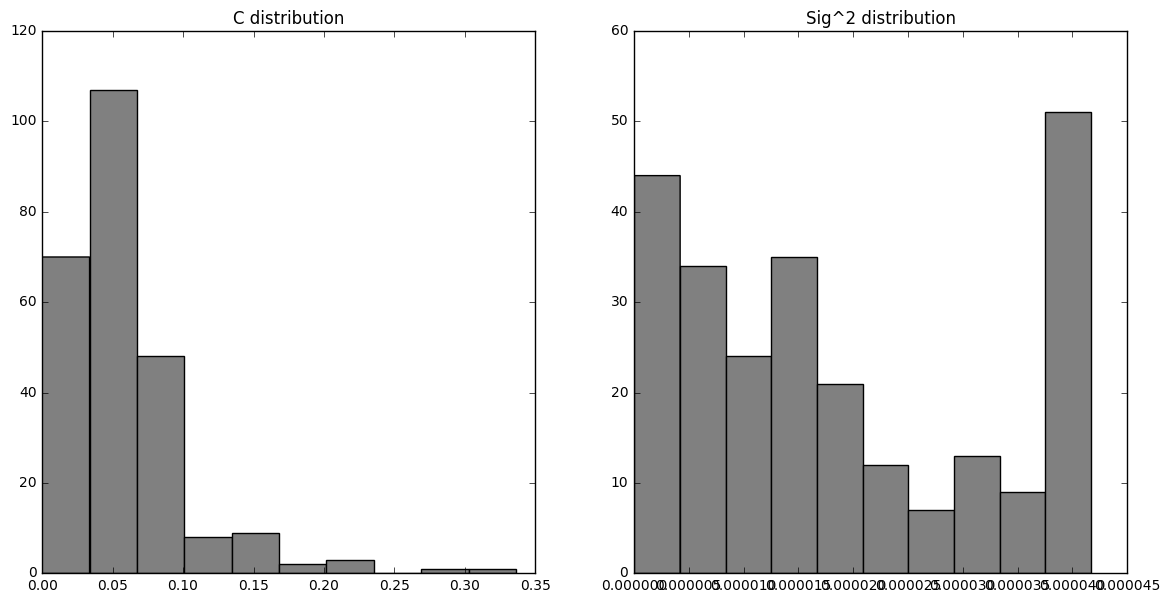

In [16]:
nfev = 100*(len(elm02.get_params())+1)
elm_solver(elm02, method='standard', max_nfev=nfev)

In [17]:
# gaussian agglomeration
xc, yc, c, sig = elm02.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict02 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 168 and 194 with 2.08297888792e-12 dissimilarity
Merged components 47 and 69 with 2.08142243829e-07 dissimilarity
Merged components 102 and 127 with 5.02523599212e-05 dissimilarity
Merged components 63 and 216 with 0.000798695928956 dissimilarity
Merged components 103 and 179 with 0.000920010933304 dissimilarity
Merged components 18 and 234 with 0.00107124146163 dissimilarity
Merged components 72 and 86 with 0.00152211591276 dissimilarity
Merged components 56 and 175 with 0.00154508239535 dissimilarity
Merged components 23 and 209 with 0.00163559529825 dissimilarity
Merged components 157 and 178 with 0.00164443746269 dissimilarity
Merged components 52 and 59 with 0.00204196279957 dissimilarity
Merged components 88 and 142 with 0.0024518128134 dissimilarity
Merged components 96 and 109 with 0.00257525696031 dissimilarity
Merged components 97 and 148 with 0.00265177313512 dissimilarity
Merged components 94 and 119 with 0.00271935246387 dissimilarity
Merged components 18

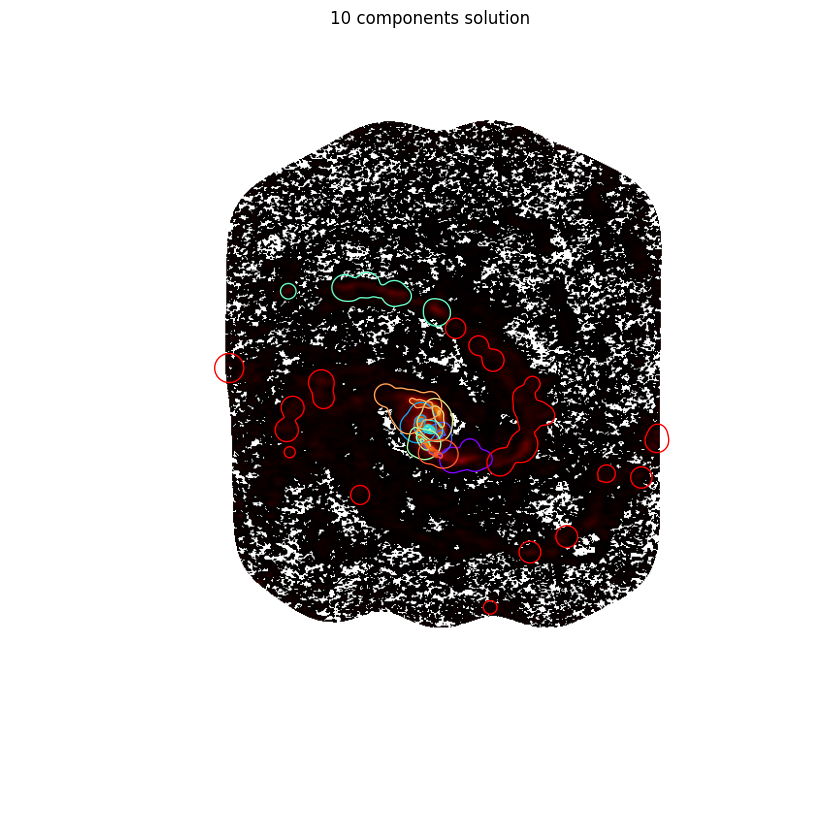

<function graph.components_plot>

In [18]:
interact(components_plot, elm=fixed(elm02), data=fixed(data), components_dict=fixed(components_dict02), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

# `SDP81_band7_11exec.contR1.image`

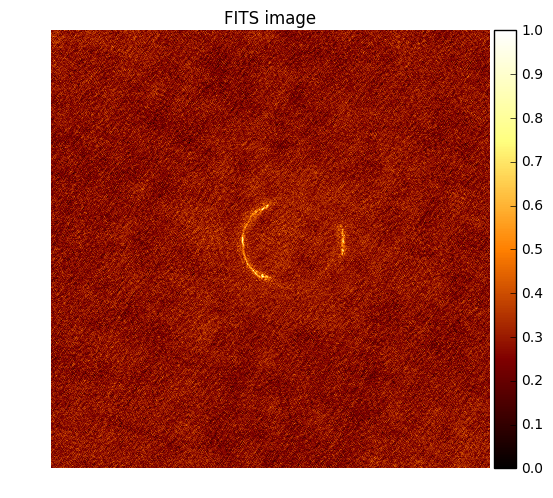

In [64]:
fits_path = "../data/images/SDP81_band7_11exec.contR1.image.fits"
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

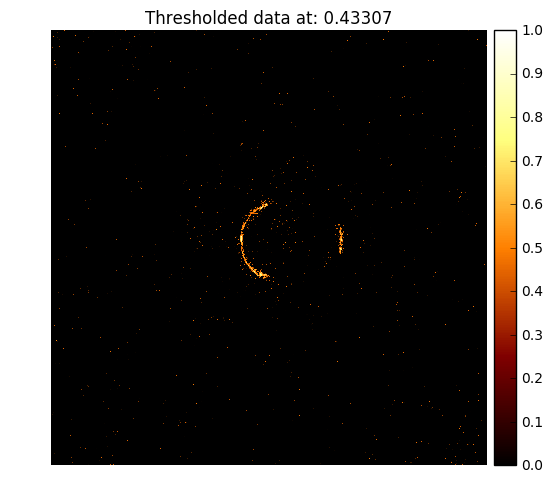

In [65]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

# `VYCMa_658_contap4.clean.fits`

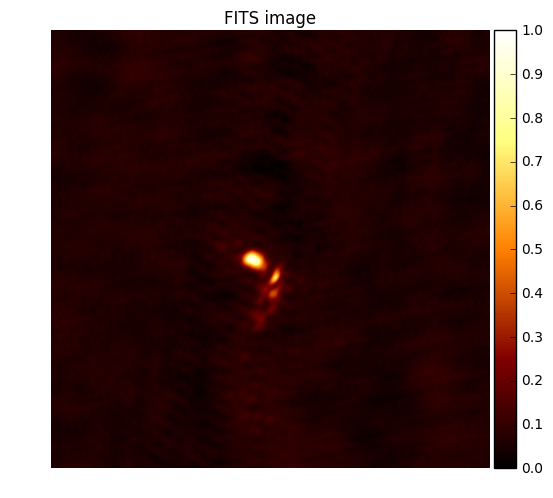

In [66]:
fits_path = "../data/images/VYCMa_658_contap4.clean.fits"
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

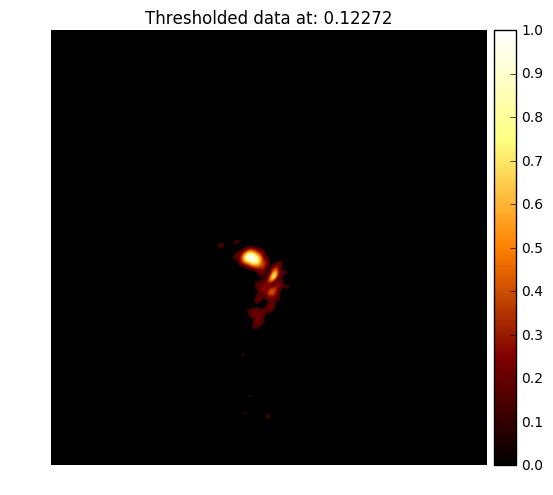

In [68]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

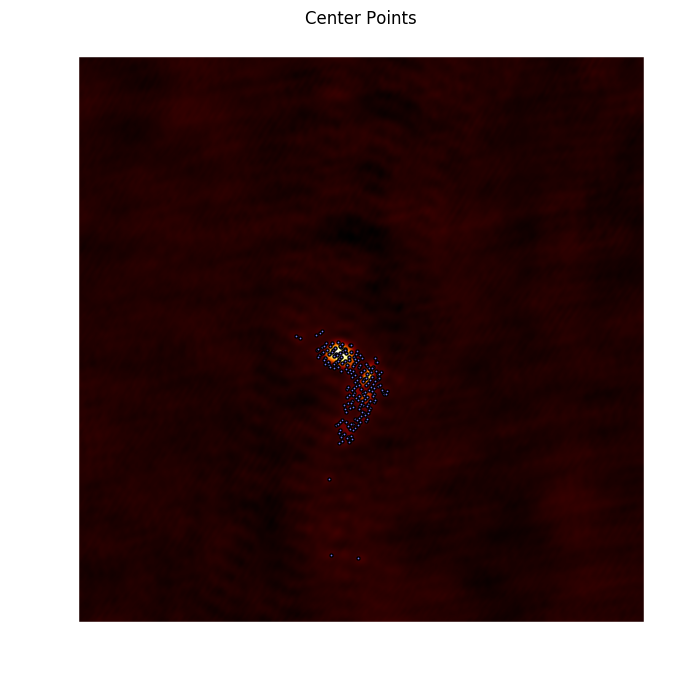

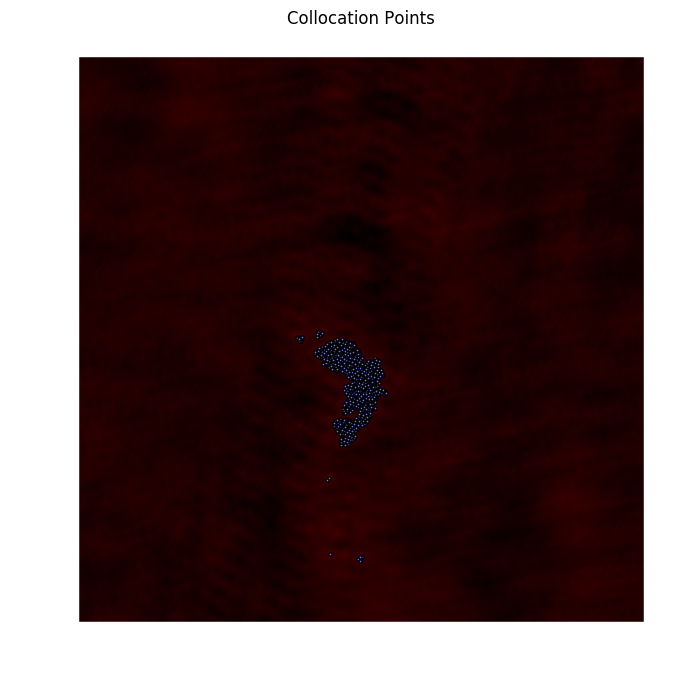

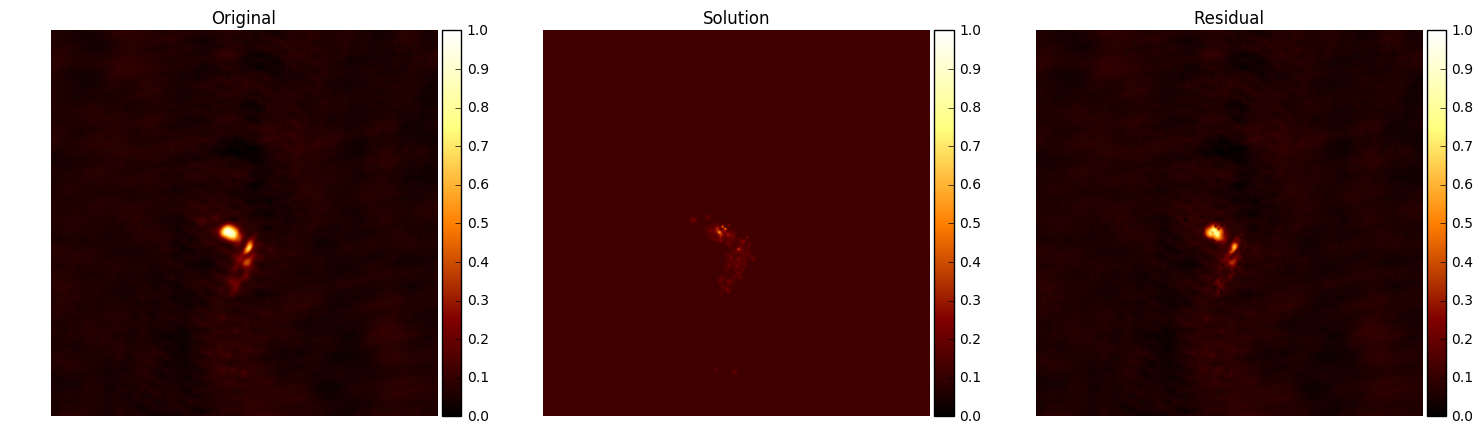

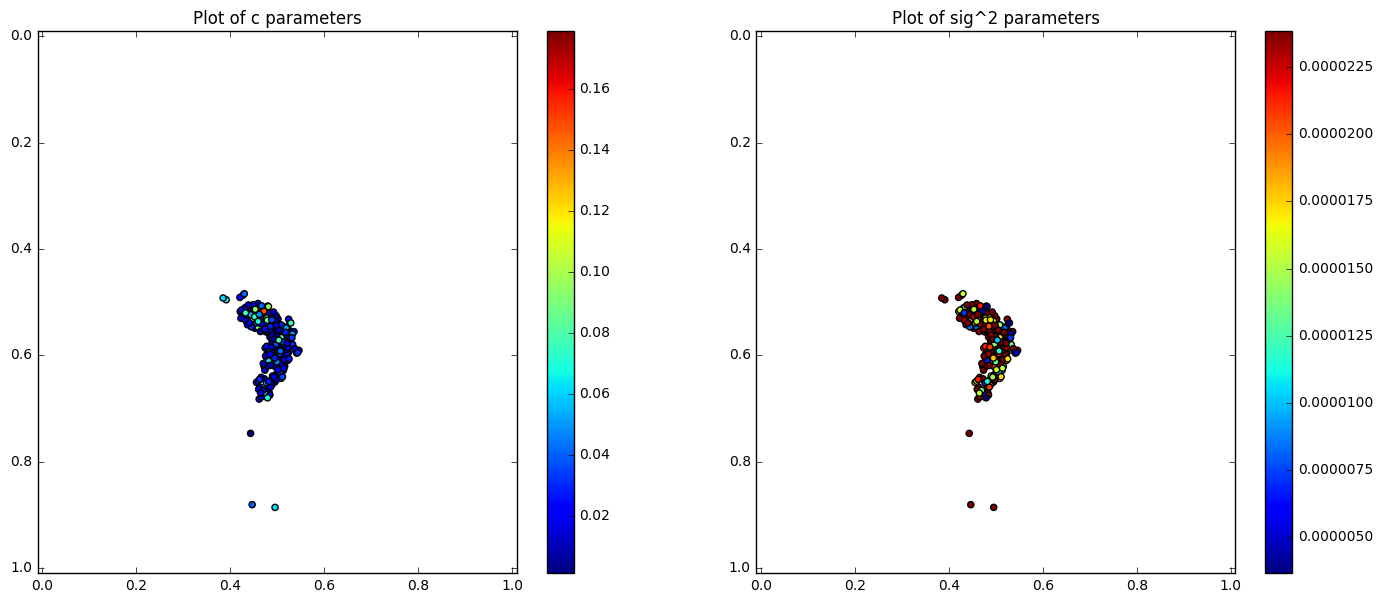

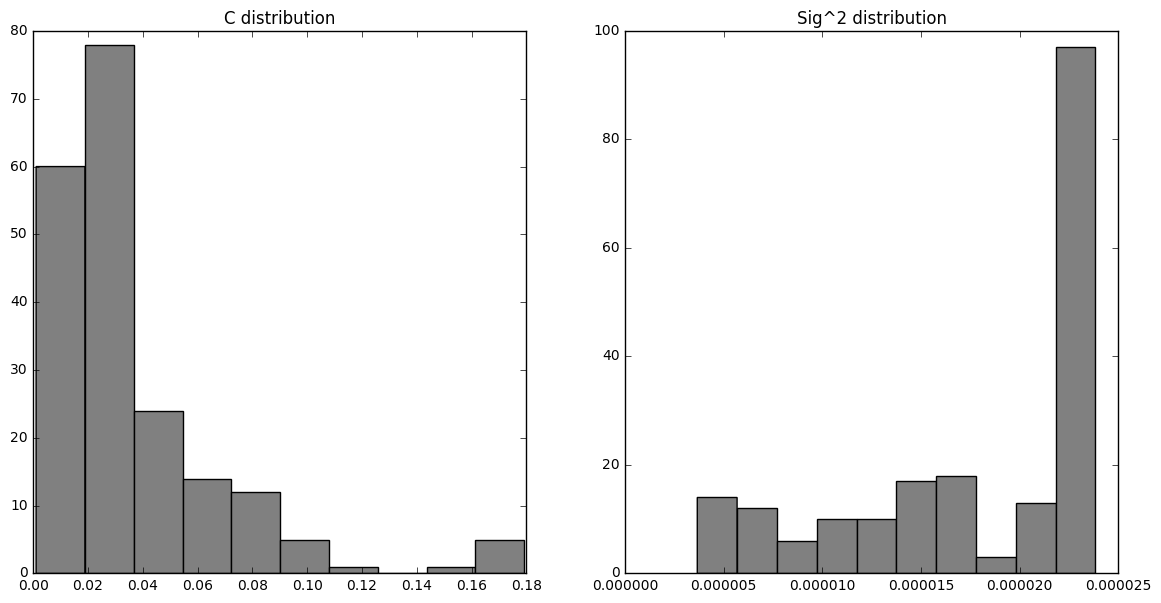

In [71]:
##########################################
# Approach 1
##########################################

base_level = 0.12272

# number of points of each type
Nb = 0
Nc = 200
Ne = 4*Nc-4*Nb

#center_points = random_centers_generation(data, Nc, base_level=base_level, power=3.)
#collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
center_points = points[0:Nc]
collocation_points = points[Nc:Nc+Ne]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm04 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80109

Residual stats:
Residual RMS: 0.122886149088
Residual Variance: 0.000109177228045
Residual Entropy: 6.3217351597
Total elapsed time: 113.58950901 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.00976778599419
Mean min distance between collocation and center points: 0.00354939465325

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.0690572119539
Max min distance in the (standarized) parameters space: 0.290408466179


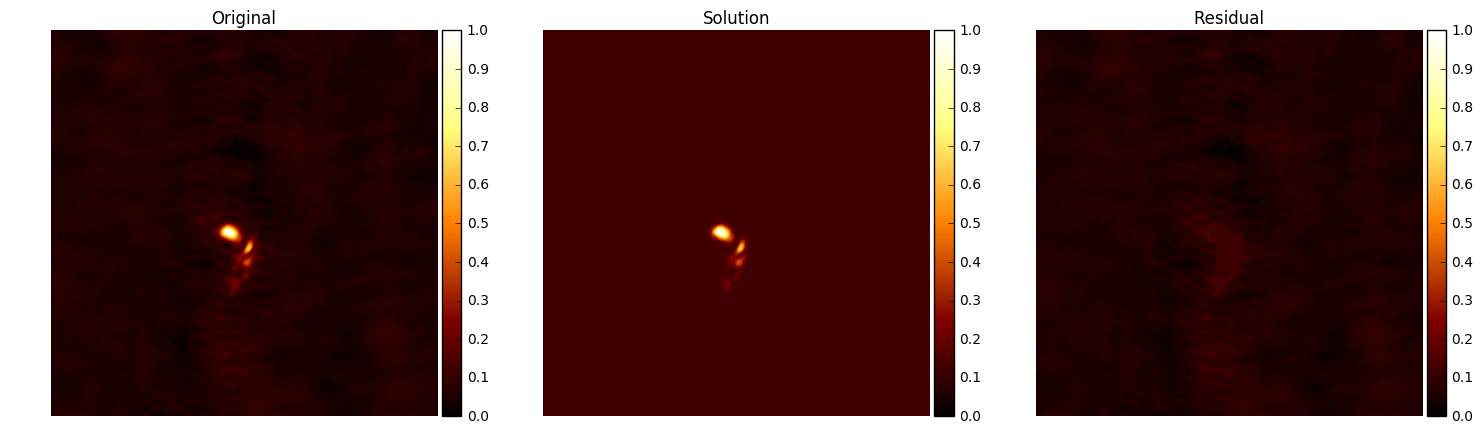

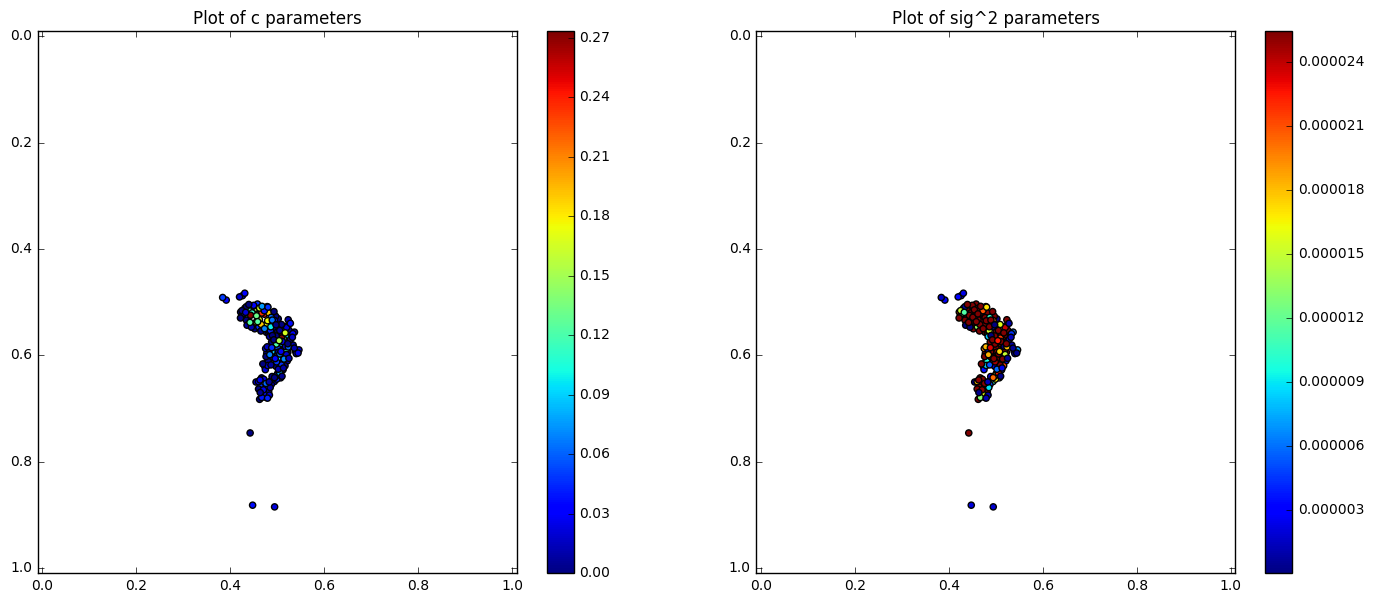

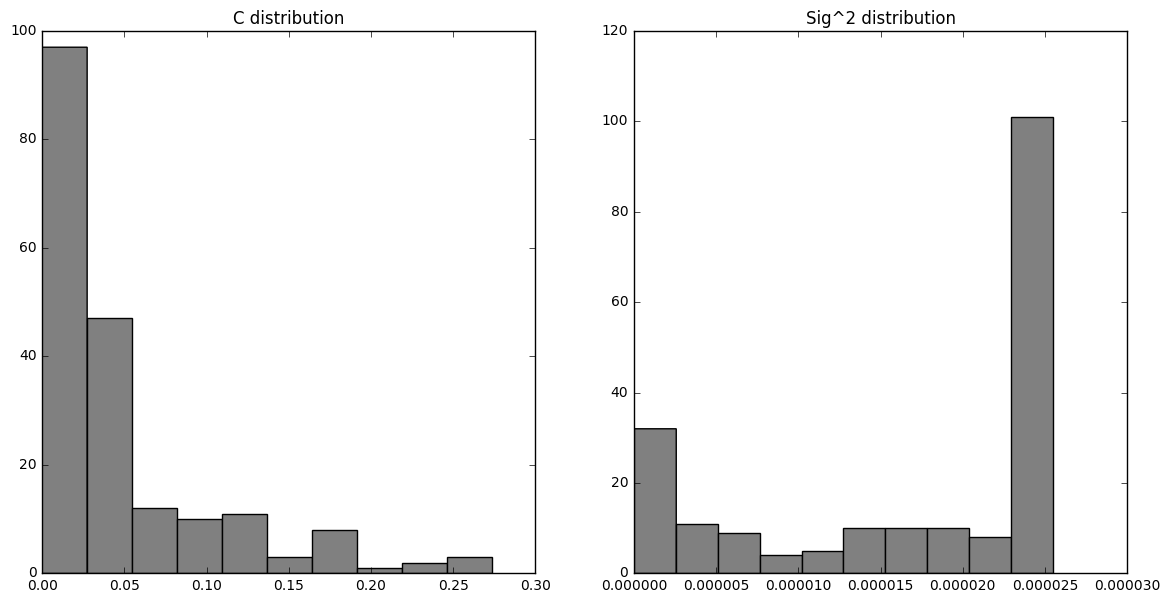

In [72]:
nfev = 100*(len(elm04.get_params())+1)
elm_solver(elm04, method='standard', max_nfev=nfev)

In [73]:
# gaussian agglomeration
xc, yc, c, sig = elm04.get_params_mapped()
mu = np.vstack([xc, yc]).T

components_dict04 = gaussian_reduction(c, mu, sig, n_comp=1)

Merged components 21 and 132 with 1.60212135908e-16 dissimilarity
Merged components 103 and 160 with 1.30270794152e-13 dissimilarity
Merged components 104 and 160 with 1.37033639089e-13 dissimilarity
Merged components 27 and 52 with 6.24278406747e-13 dissimilarity
Merged components 68 and 194 with 7.95914569123e-13 dissimilarity
Merged components 70 and 142 with 5.57772161791e-11 dissimilarity
Merged components 38 and 152 with 9.97498354413e-11 dissimilarity
Merged components 93 and 147 with 1.48385470577e-10 dissimilarity
Merged components 48 and 149 with 9.44401334912e-10 dissimilarity
Merged components 20 and 171 with 4.38307057612e-08 dissimilarity
Merged components 32 and 132 with 3.80209012329e-07 dissimilarity
Merged components 140 and 182 with 3.80789983696e-06 dissimilarity
Merged components 14 and 163 with 4.07510143504e-06 dissimilarity
Merged components 51 and 150 with 5.90089205187e-06 dissimilarity
Merged components 36 and 135 with 7.26346446341e-06 dissimilarity
Merged c

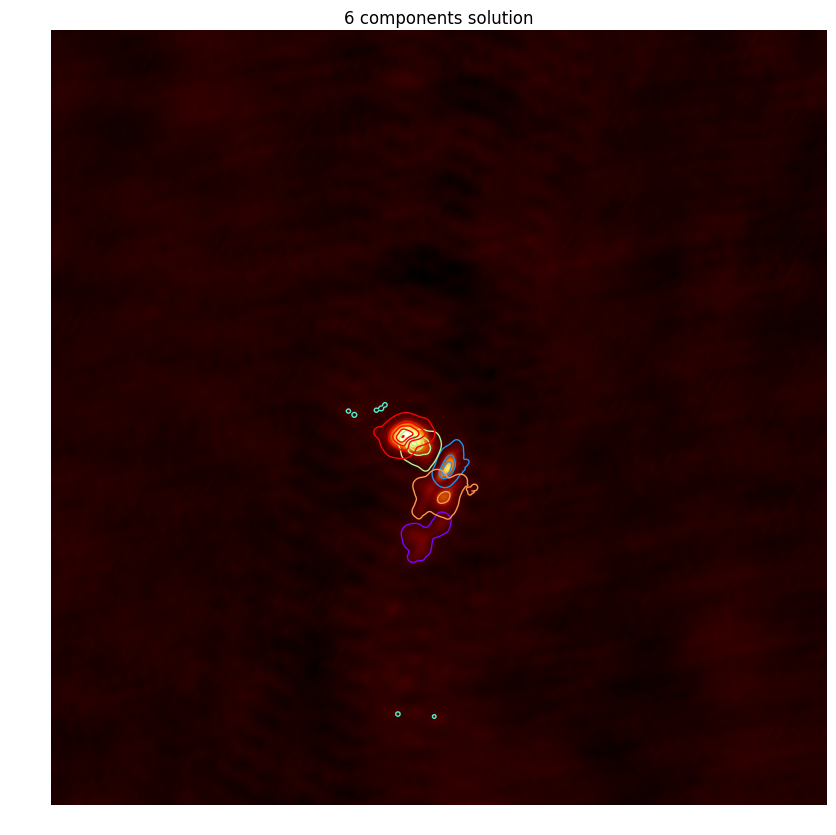

In [74]:
interact(components_plot, elm=fixed(elm04), data=fixed(data), components_dict=fixed(components_dict04), n_comp=(1,20), dims=fixed(data.shape), resolution=fixed(1), n_levels=fixed(5))

***
***

# `calibrated_final_cont_image.image`

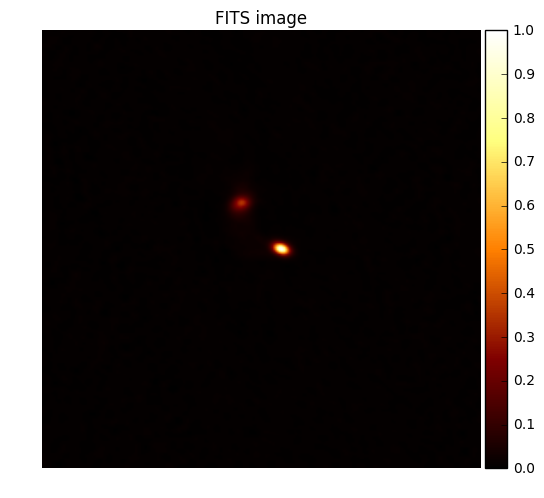

In [75]:
fits_path = "../data/images/calibrated_final_cont_image.image.fits"
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

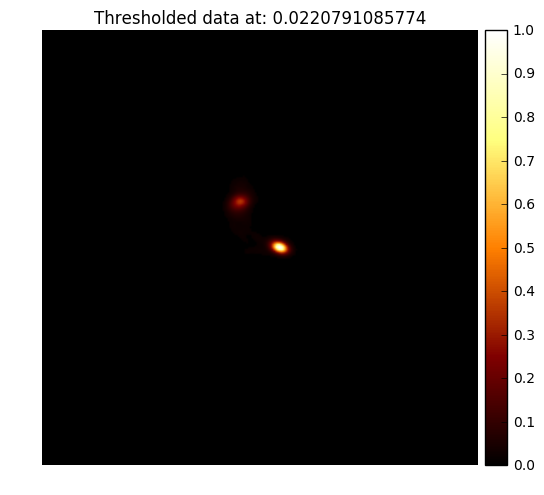

<function graph.thresholded_image_plot>

In [76]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

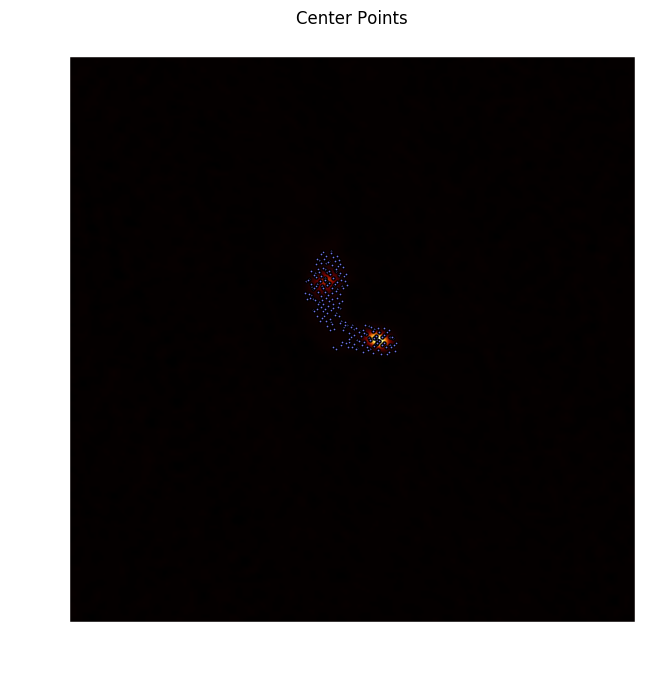

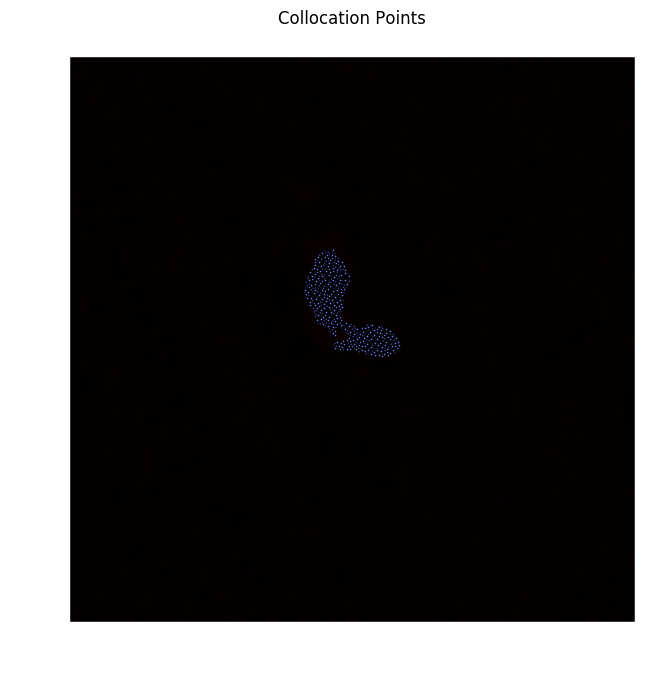

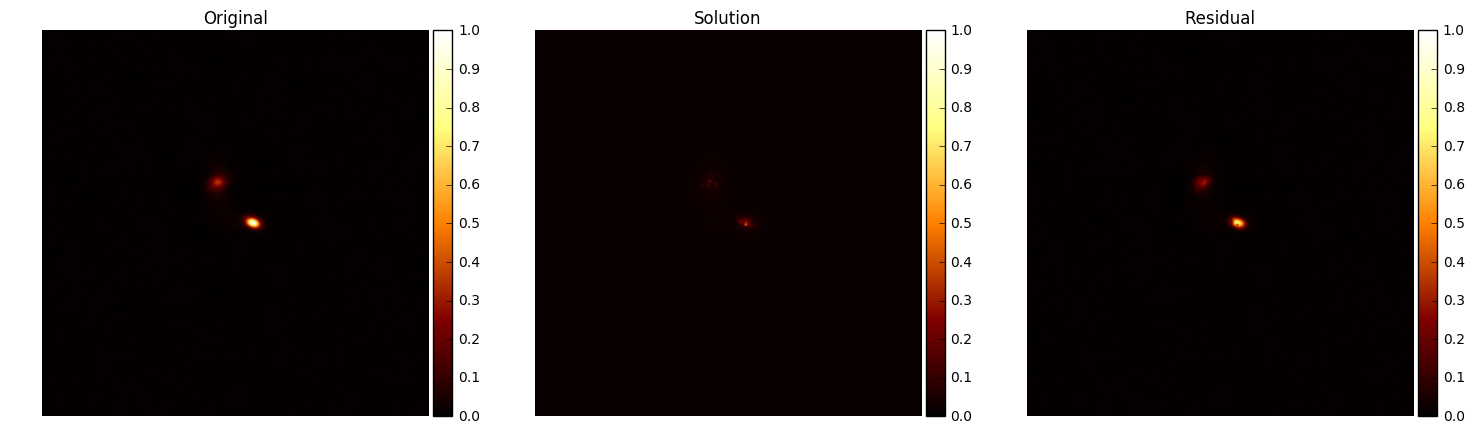

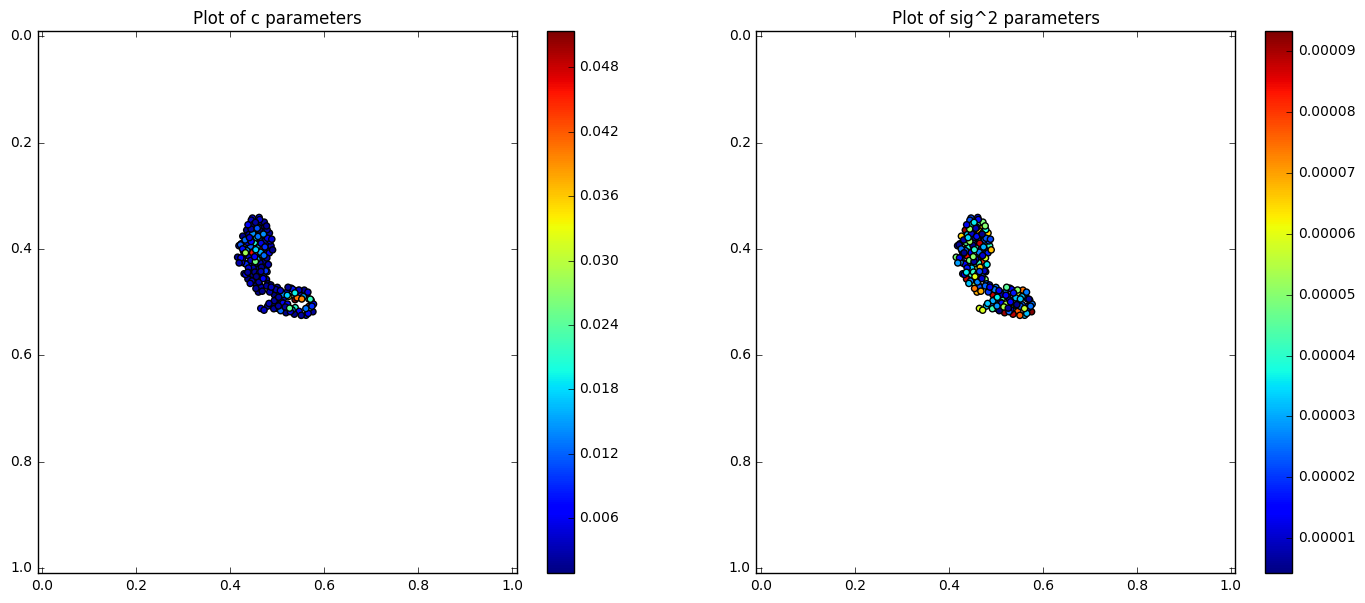

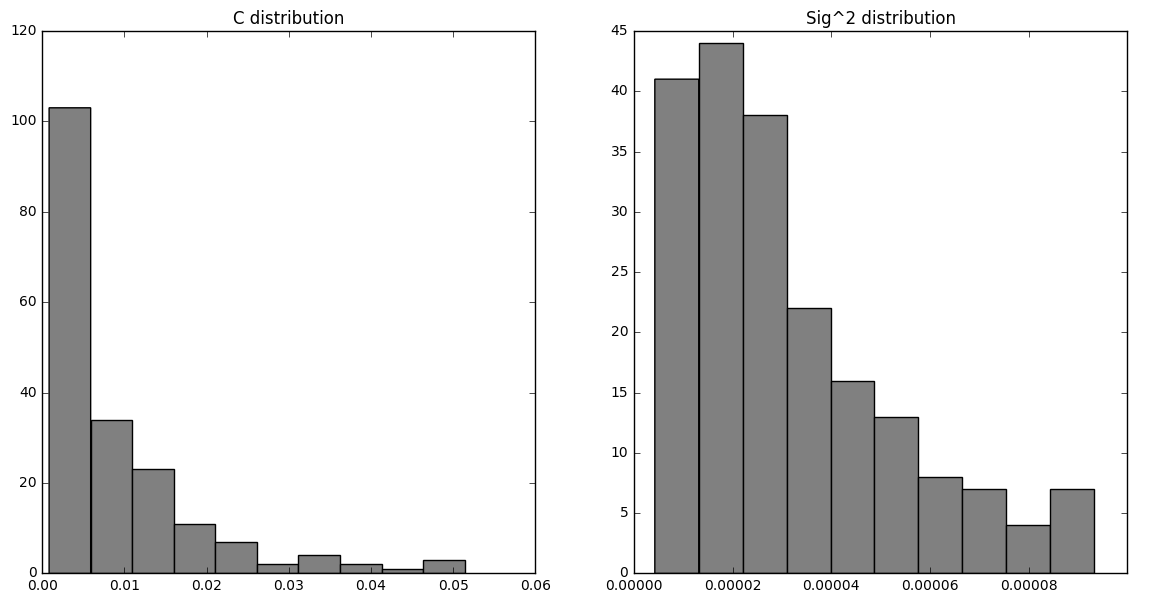

In [28]:
##########################################
# Approach 1
##########################################

# number of points of each type
Nb = 0
Nc = 200
Ne = 4*Nc-4*Nb

#center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
points = qrandom_centers_generation(dfunc, Nc+Ne, base_level, ndim=2)
center_points = points[0:Nc]
collocation_points = points[Nc:Nc+Ne]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm05 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80111

Residual stats:
Residual RMS: 0.0223901054535
Residual Variance: 1.16920461279e-05
Residual Entropy: 6.02509165628
Total elapsed time: 139.535485029 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.00868212589052
Mean min distance between collocation and center points: 0.00359774361624

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.0673494829318
Max min distance in the (standarized) parameters space: 0.223772443996


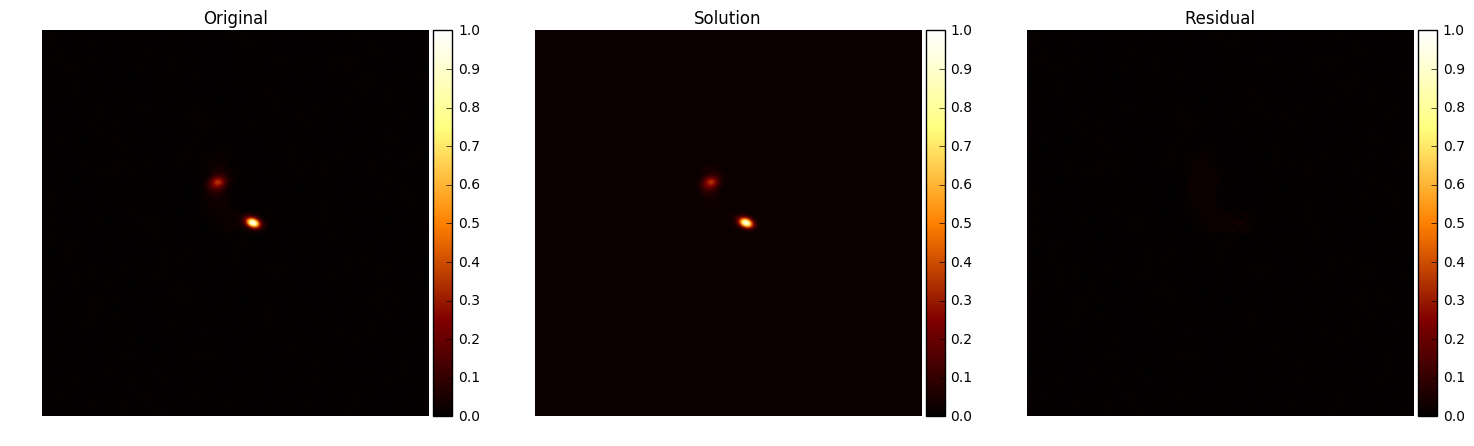

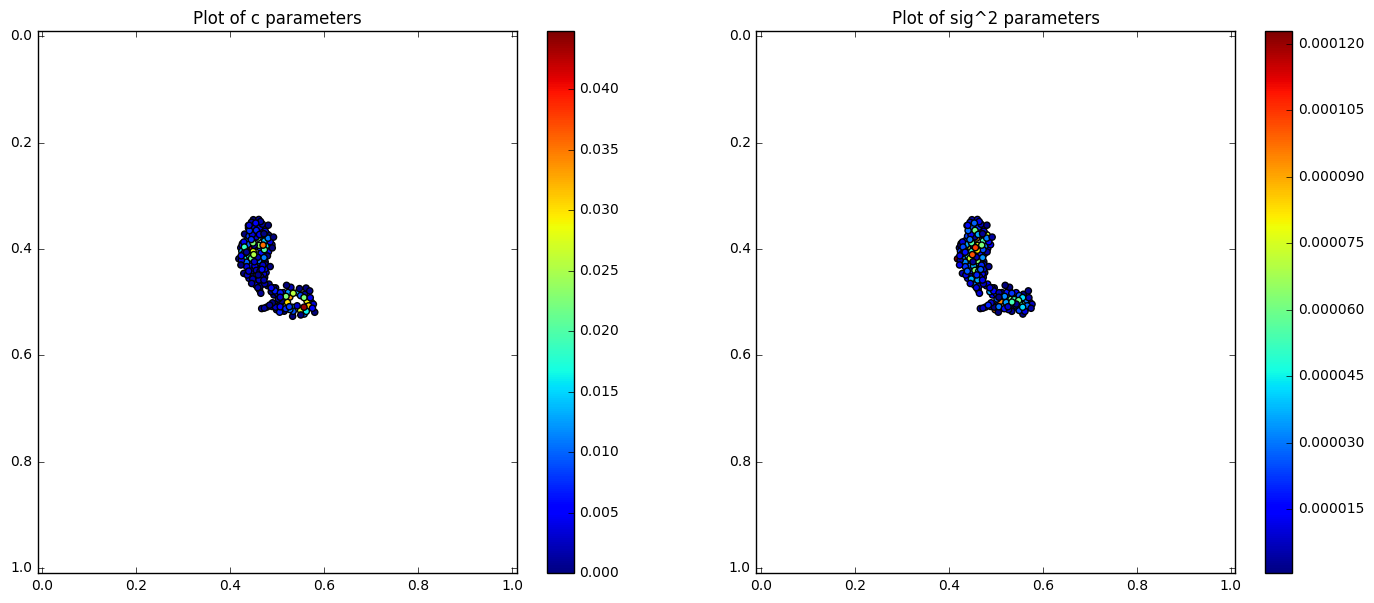

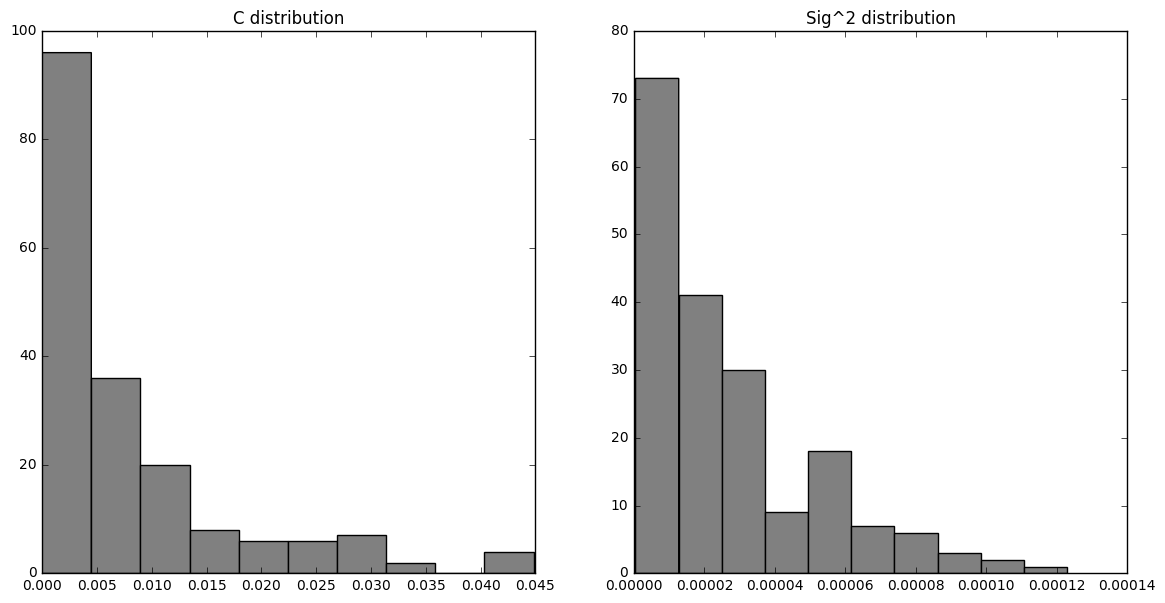

In [29]:
nfev = 100*(len(elm05.get_params())+1)
elm_solver(elm05, method='standard', max_nfev=nfev)

***
***

# `CenA.Cont.Clean.image`

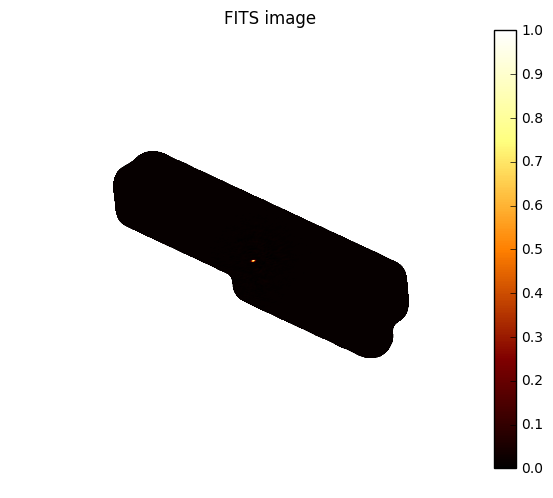

In [114]:
fits_path = '../data/images/CenA.Cont.Clean.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)